# Pymaceuticals Inc.
---

### Analysis

There are 249 individual mice in the trial. The pie chart shows that there is almost an even split of male(50.7) to female (49.3)

The lowest and highest mean tumor volume was for mice treated with Ramicane(40.21) and Naftisol(54.33). This suggests that Ramicane may be the most efficient at fighting or preventing tumors, while Naftisol may be the least efficient.

The bar graph shows Capomulin and Ramicane as the drug with the most time points. This suggests that they may be the most efficient at fighting tumors, or have the least taxing regimen. Mice were less likely to die while on one of these regimen.

The only drug to have an outlier was Infubinol, where the outlier mouce had tumors comparible to the mean of mice treated with Capomulin or Ramicane. This may suggest a data entry error, or a mouse that wasn't as prone to developing tumors.

The line plot suggests that mouse I509 had a steady increase in tumors for the first 20 days. It then lowered its volume by 5 mm3 after 35 days.

The correlation was .84 suggesting a strong correlation. 
The regression analysis suggests that as weight increases on a mouse, its tumor volume increases by approximately 20 mm3.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
data_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data_df.loc[data_df["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= data_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df.loc[data_df["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats=clean_df.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
r_mean=regimen_stats['Tumor Volume (mm3)'].mean()
r_median=regimen_stats['Tumor Volume (mm3)'].median()
r_var=regimen_stats['Tumor Volume (mm3)'].var()
r_stdv=regimen_stats['Tumor Volume (mm3)'].std()
r_sem=regimen_stats['Tumor Volume (mm3)'].sem()

regimen_stats_df=pd.DataFrame({"Mean Tumor Volume":r_mean,"Median Tumor Volume":r_median,"Tumor Volume Variance":r_var, 
                   "Tumor Volume Std. Dev.":r_stdv,"Tumor Volume Std. Err.":r_sem})
regimen_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
single_line_df=clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
single_line_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of timepoints')

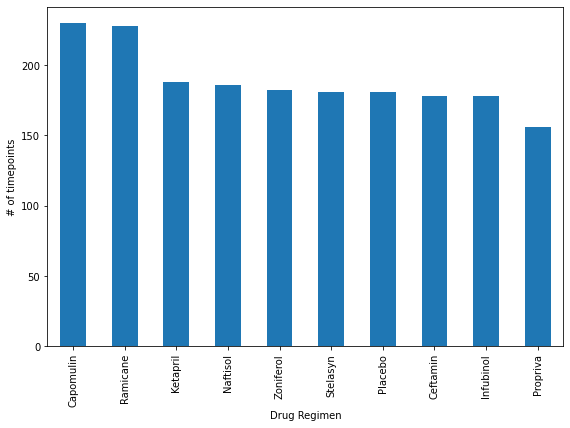

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_df=clean_df["Drug Regimen"].value_counts()
observed_df.plot(kind="bar", figsize=(9.25, 6.25))
plt.xlabel("Drug Regimen")
plt.ylabel("# of timepoints")

<Figure size 666x450 with 0 Axes>

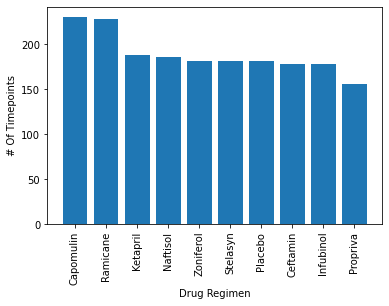

<Figure size 666x450 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(observed_df.index.values, observed_df.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("# Of Timepoints")
plt.figure(figsize=(9.25, 6.25)) #I wanted my figures same size as the original, but this part isnt working

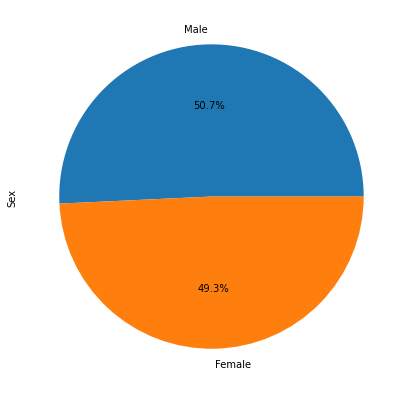

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df=clean_df["Sex"].value_counts()
sex_df.plot(kind="pie", figsize=(7,7),autopct='%1.1f%%')

Text(0, 0.5, 'sex')

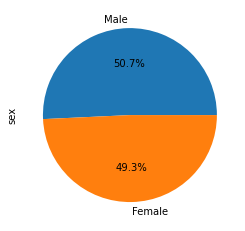

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df,autopct='%1.1f%%',labels=("Male","Female"))
plt.ylabel("sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
ca_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ra_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
i_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ce_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
time_df = clean_df.groupby(["Mouse ID"]).max()
time2_df = time_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = time2_df[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
def outliers(regimen):
    regimen_data = merge_df.loc[merge_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
ca = outliers("Capomulin")
ra = outliers("Ramicane")
i = outliers("Infubinol")
ce = outliers("Ceftamin")
final_data=[ca,ra,i,ce]

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    print(treatment+" Results") #Formatting to make it easier to read
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data_df = clean_df.loc[clean_df['Drug Regimen'].isin([treatment]), 'Tumor Volume (mm3)'] #google bard helped debug this line
    vol_data.append(data_df)
    # add subset 
    subset=data_df.sample(20)
    
    # Determine outliers using upper and lower bounds
    quartiles=data_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * quartiles)
    upper_bound = upperq + (1.5 * quartiles)
    print(f"The lower quartile of Tumer Volume (mm3) for {treatment} is: {lowerq}")
    print(f"The upper quartile of Tumer Volume (mm3) for {treatment} is: {upperq}")
    print(f"The IQR of Tumer Volume (mm3) for {treatment} is: {iqr}")
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("----------------------------------------------") # A break to make the results easier to read

Capomulin Results
The lower quartile of Tumer Volume (mm3) for Capomulin is: 37.685932865
The upper quartile of Tumer Volume (mm3) for Capomulin is: 45.0
The IQR of Tumer Volume (mm3) for Capomulin is: 7.314067135000002
Values below 0.25   -18.842966
0.50   -24.650780
0.75   -29.814067
Name: Tumor Volume (mm3), dtype: float64 could be outliers.
Values above 0.25    101.528899
0.50    107.336713
0.75    112.500000
Name: Tumor Volume (mm3), dtype: float64 could be outliers.
----------------------------------------------
Ramicane Results
The lower quartile of Tumer Volume (mm3) for Ramicane is: 36.67463458499999
The upper quartile of Tumer Volume (mm3) for Ramicane is: 45.0
The IQR of Tumer Volume (mm3) for Ramicane is: 8.325365415000007
Values below 0.25   -18.337317
0.50   -24.335219
0.75   -30.825365
Name: Tumor Volume (mm3), dtype: float64 could be outliers.
Values above 0.25    100.011952
0.50    106.009853
0.75    112.500000
Name: Tumor Volume (mm3), dtype: float64 could be outliers

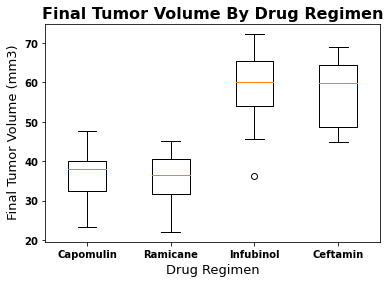

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume By Drug Regimen', fontsize=16, fontweight='bold')
ax1.set_ylabel(' Final Tumor Volume (mm3)',fontsize=13)
ax1.set_xlabel('Drug Regimen',fontsize=13)
ax1.boxplot(final_data) #askBCS assisted.
ax1.set_xticklabels(treatments)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

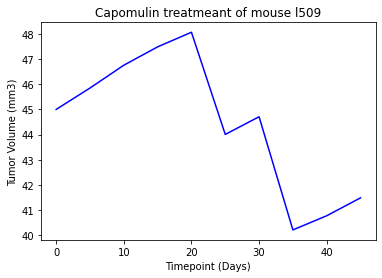

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
linedf = ca_df.loc[ca_df["Mouse ID"] == "l509",:]
xaxis = linedf["Timepoint"]
yaxis = linedf["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(xaxis, yaxis,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

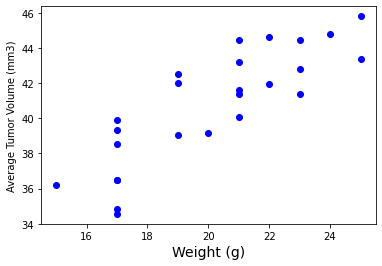

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avoldf =ca_df.groupby(['Mouse ID']).mean()

plt.scatter(avoldf['Weight (g)'],avoldf['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


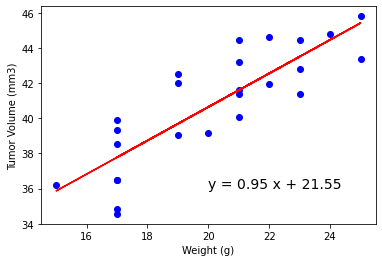

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corre = st.pearsonr(avoldf['Weight (g)'],avoldf['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corre[0],2)}")

from scipy.stats import linregress

(slope, intercept,rvalue, pvalue, stderr)= linregress(avoldf["Weight (g)"],avoldf["Tumor Volume (mm3)"])
regress=avoldf["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avoldf["Weight (g)"],avoldf["Tumor Volume (mm3)"],color='b')
plt.plot(avoldf["Weight (g)"], regress, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()